# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [1]:
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [2]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)


---
# 1. Visualize the input images


In [4]:
# Select an image and its label by list index
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

## TODO: Print out 1. The shape of the image and 2. The image's label `selected_label`

## TODO: Display a night image
# Note the differences between the day and night images
# Any measurable differences can be used to classify these images
print("SHAPE:",selected_image.shape,"\nLABEL:", selected_label)

SHAPE: (555, 800, 3) 
LABEL: day


# Preprocessing the data

In [5]:
# Standardize the input images
def standardize_output(image):
    return cv2.resize(image,(1100,600))

In [6]:
## Encode the images, by assigning 0/1 to night/day
def encode(label):
    if label=='night':
        return 0
    return 1

In [7]:
## Generate a standardized list of images
# Input : image-label pairs
# Output: list of **standardized** images which are of same size and have numerical labels attached
def standardize(image_list):
    output = []
    for i in image_list:
        image , label = i[0], i[1]
        output.append((standardize_output(image), encode(label)))
    return output

In [8]:
## Standardize images by invoking the above functions on real data
STANDARDIZED_LIST = standardize(IMAGE_LIST)

Text(0.5,1,'0')

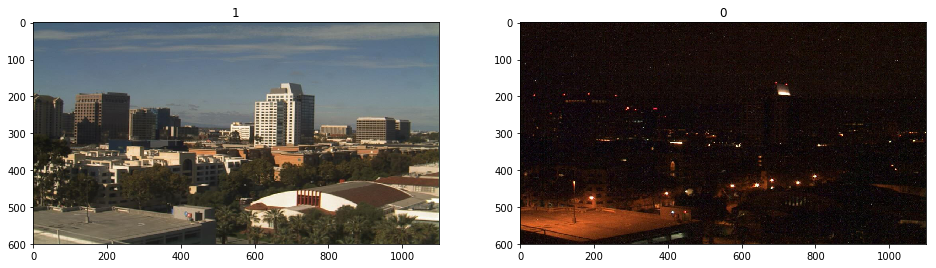

In [17]:
#Visualize the Standardized Data

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

ax1.imshow(STANDARDIZED_LIST[1][0])
ax1.set_title(STANDARDIZED_LIST[1][1])

ax2.imshow(STANDARDIZED_LIST[234][0])
ax2.set_title(STANDARDIZED_LIST[234][1])

# Feature Extraction

In [10]:
## Calculate average brightness of an image
def avg_brightness(image):
    # convert RGB to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    sum_value_channel = np.sum(hsv_image[:,:,2])
    img_area = 600*1100
    return sum_value_channel/img_area

# Classification

In [11]:
def classify(image):
    avg = avg_brightness(image)
    predicted_label = 0 #default
    threshold = 100.0 #arbitrarily
    if(avg > threshold):
        predicted_label=1
    return predicted_label

# Testing

In [12]:
import random
TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)
random.shuffle(STANDARDIZED_TEST_LIST)

In [13]:
def misclassified_images(test_images):
    misclass=[]
    for i in test_images:
        img,true_label=i[0],i[1]
        predicted_label=classify(img)
        if(predicted_label!=true_label):
            misclass.append((img,predicted_label))
    return misclass

In [14]:
#Accuracy

total = len(STANDARDIZED_TEST_LIST)
wrong = len(misclassified_images(STANDARDIZED_TEST_LIST))
correct = total - wrong
print("ACCURACY = ", correct/total)
print("NUMBER OF MISCLASSIFIED IMAGES = ",wrong)
print("TOTAL IMAGES = ",total)

ACCURACY =  0.925
NUMBER OF MISCLASSIFIED IMAGES =  12
TOTAL IMAGES =  160


Predicted Label = Night : 0, Day : 1


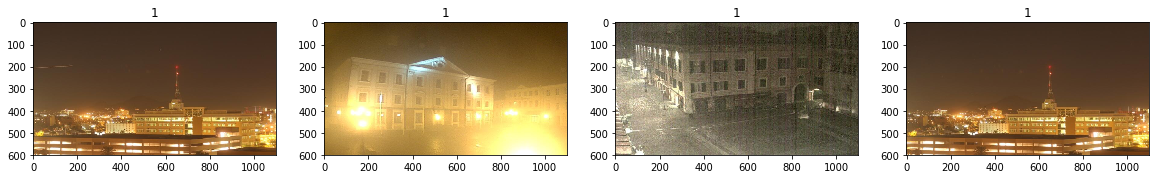

In [15]:
#Exploring Misclassified Images

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
MISCLASSIFIED = misclassified_images(STANDARDIZED_TEST_LIST)
ax1.imshow(MISCLASSIFIED[0][0])
ax1.set_title(MISCLASSIFIED[0][1])
ax2.imshow(MISCLASSIFIED[3][0])
ax2.set_title(MISCLASSIFIED[3][1])
ax3.imshow(MISCLASSIFIED[2][0])
ax3.set_title(MISCLASSIFIED[2][1])
ax4.imshow(MISCLASSIFIED[11][0])
ax4.set_title(MISCLASSIFIED[11][1])
print("Predicted Label = Night : 0, Day : 1")